**Edi Yovani Tomas Reynoso**
**2015038**


*  1). ***Redes Neuronales:***  Deportados de Estados Unidos mayores y menores de edad acompañados y no acompañados. 
      Los datos fueron sacados de esta pagina : 
        https://www.ine.gob.gt/estadisticas-de-migracion/
*  2). ***Clasificación mediante el modelo investigado*** Importación de vehículos por clasificación de uso, según mes. Los datos fueron sacados de esta pagina : 
        https://www.ine.gob.gt/estadisticas-de-transportes-y-servicios/
       


* Redes Neuronales


In [ ]:
# Import Perceptron
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

# Data creation
Mes=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
hombres = [536, 366,333, 255, 382, 250, 317, 353, 1116, 1913, 2350, 1309]
mujeres = [13, 26, 27, 25, 35, 15, 36, 100, 1068, 962, 1325, 901 ]
Total_Deportados = [ 553, 398,367, 282, 424, 269, 375, 587, 3354, 3540, 4784, 2873 ]
Play=['N','N','N','N','N','N','S','S','S','S','S','S'] # Acompañados



# Creating labelEncoder
le = preprocessing.LabelEncoder()

label=le.fit_transform(Play)
print(" value:",label)

# Converting string labels into numbers.
Mes_encoded=le.fit_transform(Mes)

# Combinig attributes into single listof tuples
features=list(zip(Mes_encoded,hombres,mujeres,Total_Deportados))

# Create and fit the model
model = MLPClassifier(activation='logistic', max_iter=200,
                      hidden_layer_sizes=(5,), alpha=0.001,
                      solver='lbfgs')
model.fit(features, label)


predicted = model.predict(features) 
print("Predicted value:", predicted)

 value: [0 0 0 0 0 0 1 1 1 1 1 1]
Predicted value: [0 0 0 0 0 0 1 1 1 1 1 1]


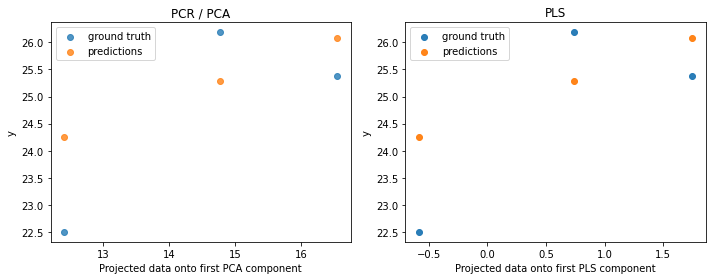

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import numpy as np
#from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd



# cargar el csv desde github mediante pandas
#url = 'https://raw.githubusercontent.com/luisespino/artificial_intelligence/master/machine_learning_scikit_learn/pa.csv'
#df = pd.read_csv(url)

# establecer los datos de entrenamiento

#X = np.asarray(df['ciclomes']).reshape(-1,1)
#y = df['pa']

X =   np.asarray([  14.336,17.227,16.549,12.415,14.768,11.993,12.777,11.866,14.298,11.585,14.165,12.805]).reshape(-1,1)#Uso de carros por mes
y = [  17.374,30.134,25.385,22.506,26.182,22.112,26.861,26.291,23.669,26.071,25.522,24.346]  # Nuevos Carros


#X = np.array([1.50, 1.52, 1.60, 1.70, 1.80,1.90,2.00]).reshape(-1, 1)
#y = np.array([148, 170, 180, 190, 200,201,175])
rng = np.random.RandomState(100) #  Numero de comportamiento de la graica 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

#PCA
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline
#PLS
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.78, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.78, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.95, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.95, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()